Introduction

How do you know if this wine is bad or not?

Could it be that you have seen it before and tasted it before?
That's the principal of learning!

But how do I get a machine to learn if I can't give it wine to drink?

Well I give it some data!

A computer isn't much of a sommeiller but combined with an LCMS and a snooty Frenchman it gets pretty good results!

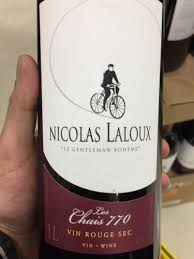


First things first

Some things to understand where we are working currently.

This is google colab. It is an interactive python file that uses googles cloud based computing to run any of your algorithims online. This is an excellent place to learn python as it already has a lot of modules preinstalled, and can make getting into coding less daunting.
Keep in mind google colab is based in linux . 

What is the problem statement?

You have been hired as a junior food scientist / engineer to help increase the quality of the wine at a large winery.  You know that there are certain compounds in wien that make it taste great. A few of these include the fixed acidity and the volatile acidity,  residual sugar  ( i dislike a sweet wine but some people do! ) , sulphates , % alcohol and so on.  
Your manager gives you some data collected from a team of  food scientists that just spent hundreds of hours collecting you some good data. Your then going to take this data and  create a machine learning  algortithim that is going help you predict the quality of the wine and therefore find which key parameters that will help you  improve the wine at this winery!

Two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

1) Understand what kind of problem you have from a machine learning perspective.
2)  This tutorial will focus on supervised learning.

Supervised Learning 
Models are fit on training data comprised of inputs and outputs and used to make predictions on test sets where only the inputs are provided and the outputs from the model are compared to the withheld target variables and used to estimate the skill of the model.
In a  few words: you are given training data and you are asked to predict some output data.
This can be further broken down into

Classification: Supervised learning problem that involves predicting a class label.
Regression: Supervised learning problem that involves predicting a numerical label.


------------------------------------------------------------------



Steps to do

1) Understand what the data looks like and what it could mean.  
2) Pre process the data so you can load into into python and make it useabel & readable to your algorithim.

3) Need to take a section of your data and split into   Testing data and Training datasets.

training set—a subset to train a model.
test set—a subset to test the trained model.
Make sure that your test set meets the following two conditions:

Is large enough to yield statistically meaningful results.
Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.  Key thing.  Never train on test data. If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set.


4) Choose a model that works well with your data and what you want to achieve.   In this case we will be using a random forest model.

5) Train the random forest model.

6) Evaluate on your test data

7) You now havea trained random forest model

8) GIve your  algorithim some new data , the test data, and see what it predicts!


In [ ]:
#Quick coding reminder


#1.4  float

#1  integer

#"yeet" string

#true/ false  boolean

#for number  in numbers
# for <iterator> in  <group of items>

#while something happens do something

#oof =  3+5  , oof is a integer variable

#   .  calls a function
# example     yeet.enlargen()    calls the enlargen function on yeet   , and i nthe brackets there are some input parameters

Importing the Dependencies needed for the code

In [ ]:
import numpy as np  #this is used for a lot of mathematics, needed for numpy arrays
import pandas as pd  #this is for creating pandas dataframes, important for processing data,  # for a dataframe imagien an excel sheet in your code instead of excel
import matplotlib.pyplot as plt #for plots  ( plt is just to make it shorthand, computer scientists are lazy)
import seaborn as sns #really freaking nice graphs
from sklearn.model_selection import train_test_split #this helps you split the dataset into train and test VERY useful function
from sklearn.ensemble import RandomForestClassifier #we are doing random forest classification, so lets not reinvent the wheel and just import a function
from sklearn.metrics import accuracy_score  #its important to get a visible score of how well your model does

Working with the data  and a bit of preprocessing!

In [ ]:
# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/JWwineQualityWhites.csv') #this is done by clicking on the copy path on the data you uploaded
#the pd.read helps you read the csv file.  remember computers are dumb and must be told exactly what to do


In [ ]:
# number of rows & columns in the dataset
wine_dataset.shape #shape function gives the number of rows and columns, these columns are the chemical characteristics , we can call them features in computer science

(4898, 13)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head() #head just calls the first 5 rows and displays them

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,NaN,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_dataset=wine_dataset.drop(['Unnamed: 0'], axis=1) # so lets say we want to get rid of that first column because it may not be useful for us
#the  .drop function drops or deletes the desired colum, axis is dropping at the 1st index of the columns

In [ ]:
wine_dataset.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,NaN,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# checking for any missing values
wine_dataset.isnull().sum()  #this is important to check if you need to do more preprocessing on the datata
#if any values were missing you would need to replace them / or delete them. replacing them could be with the mean value of the other numbers.
# in this case we will drop a row.


fixed.acidity           0
volatile.acidity        2
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#remove the rows with missing values

wine_dataset = wine_dataset.dropna()  #this removes any rows with missing values,  those darn food scientists need to step up there game!


In [ ]:
wine_dataset.shape
#we replaced the old wine dataset with the fixed up one, and now we go and check if the two rows with missing vlaues were removed
#we see that they went from 4898 to 4896 , wow thats awesome!

(4896, 12)

Analysizing the Data and Visulaizing it !

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()
#gives us alot of useful statistical data about our dataset

#wow take a look at the pH of that one white wine,  3.188 , also notice hwo the white wines at this winery dont go past 10.5 % , 
# I think they are missing out,   17 % is the only way to go!
#50% of the values are less than 6.3 for there fixed acidity (percentiles)

# you could also use this function to see if a value is missing

#this whole process is called  Exploratory Data Analysis
#want to have a human look to see if oyu can reginize any patterns


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,6.854320,0.278261,0.334171,6.392371,0.045773,35.313113,138.382047,0.994028,3.188254,0.489828,10.514293,5.878064
std,0.843721,0.100805,0.121040,5.072546,0.021852,17.008203,42.492980,0.002991,0.151028,0.114129,1.230851,0.885729
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


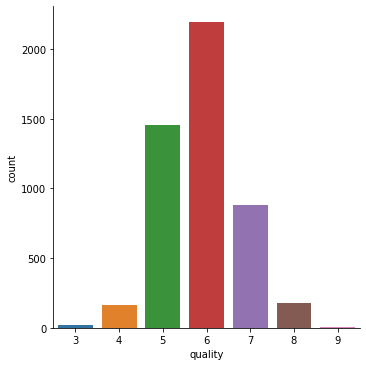

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count') 
#count is the number of features present
#here the quality feature is selected because that is what we care most about in this problem


#Question:  What kind of distribution does this look like ?

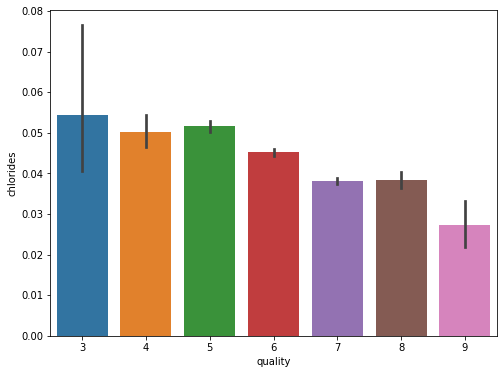

In [ ]:
# chloride left in wine  vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x='quality', y = 'chlorides', data = wine_dataset)


#Chloride concentration in the wine is influenced by terroir and its highest levels are found in wines coming from countries where irrigation is carried out using salty water or in areas with brackish terrains. 
#Australia and Argentina are the countries whose wines present the highest levels of chlorides.




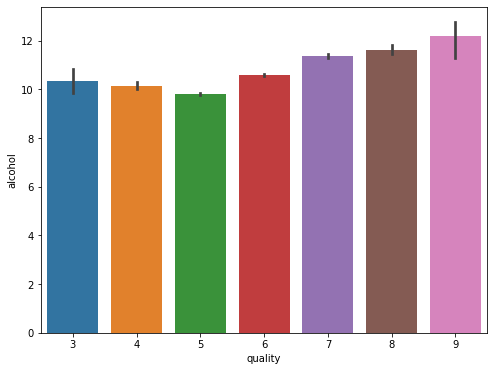

In [ ]:
# alcohol vs Quality
plot = plt.figure(figsize=(8,6))
sns.barplot(x='quality', y = 'alcohol', data = wine_dataset)

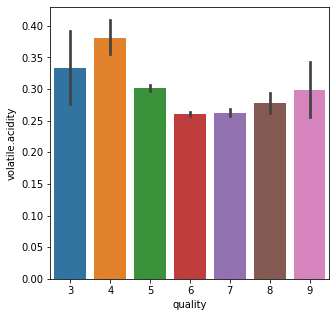

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile.acidity', data = wine_dataset)

#reported as a comparison to acetic acid 


#Question eyeballing this graph what could you say about the relationship between acidity and quality

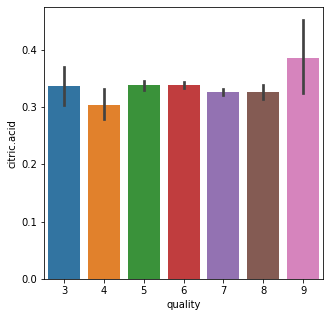

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric.acid', data = wine_dataset)

#What can you infer from this graph

Correlation

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = wine_dataset.corr()

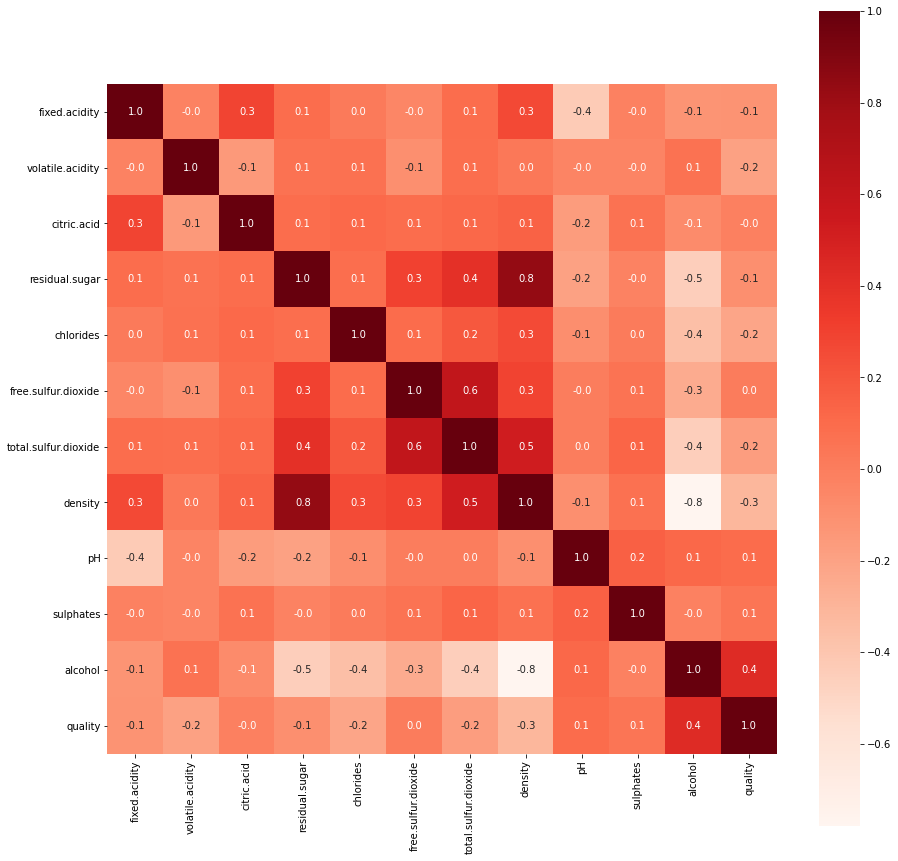

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Reds')

#correlation function  finds the correlation values
#cbar gives the legend
#square tells you its square
# .1f gives 1 floating point
#cannot gives the annotaions or legend

#Question what can you say about the features that correlate with Quality

Back to Data Preprocessing

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)

#the reason is that you will feed the data separetley to the machine learning model
#this  is Called Data Leakage,  we DONT want to give the machine learning model what the TRUE labels are 
#in this case it is easy to prevent data leakage, but it is an easy mistake to make

In [ ]:
print(X)

      fixed.acidity  volatile.acidity  citric.acid  ...    pH  sulphates  alcohol
0               7.0              0.27         0.36  ...  3.00       0.45      8.8
1               6.3              0.30         0.34  ...  3.30       0.49      9.5
3               7.2              0.23         0.32  ...  3.19       0.40      9.9
4               7.2              0.23         0.32  ...  3.19       0.40      9.9
5               8.1              0.28         0.40  ...  3.26       0.44     10.1
...             ...               ...          ...  ...   ...        ...      ...
4893            6.2              0.21         0.29  ...  3.27       0.50     11.2
4894            6.6              0.32         0.36  ...  3.15       0.46      9.6
4895            6.5              0.24         0.19  ...  2.99       0.46      9.4
4896            5.5              0.29         0.30  ...  3.34       0.38     12.8
4897            6.0              0.21         0.38  ...  3.26       0.32     11.8

[4896 rows x 11

Label Binarizaton

You want to make a cutoff if the quality is good or bad, it will be divided into two columns.


In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
#replace the values of 6 and above with 1 and values below 6 are 0
#since this wineries target market is actually McGill Froshies, the cutoff for what makes a good quality wine 
# is 6 , which would be the quality of one of those Laroux wines
#lambda is useful for replacing values but it has a bunch of other uses

In [ ]:
print(Y)  #ANYTHING YOU DO ALWAYS PRINT OR SHOW

0       1
1       1
3       1
4       1
5       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4896, dtype: int64


Train & Test Split

We are going to split our data into two parts.  The training data which we will teach our algorithim how recognize patterns amongst the dat. Since Quality is our Y value then this means the algorithim is examining how all the other features affect the Quality.

We also need a Test dataset, this must be smaller than the training dataset. Usually 70/ 30 split or 80/20.  The test data is used to see how well the model is able to predict  if our wine is of high quality or not based on  "NEW" or "Test" values the algorithim hasnt seen before.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
#this come from scikit learn
# .2 represents 20% of original data to be test data, 80% will be training
#random_state is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points
# and will not help you in debugging in case you get an issue.
#here we will have 3 possible random states

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4896,) (3916,) (980,)


Model Training:



Random Forest Classifier

In [ ]:
model = RandomForestClassifier()
#this is how you load up a model from a module ( in this case sci kit learn)

Decision Trees

https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/rfc_vs_dt11.png


So we are using a decision tree, or specifically a random forest model to help us deterimine if a wine is going to be good or bad.


In our wine example lets say.  The top node checks pH values less than 3.2  the wine quality will be bad. So if value is greater than 3.2 then the quality will be good. 

A random forest has multiple decision trees.  We have multiple decision trees in this example because we have multiple features all playing soem sort of effect in deciding if the final quality of the wine will be good or bad.  This can be done with a majority voting (example 5 good qualites and 2 bad qualities  ) or with avergaing (perhaps we went back to the original scale and any  value above 6 was considered good).

Random forest is essentially many decision trees put together.

The reason for using a random forest is because decision trees overfit. If you just train a decision tree it will really like your data and over fit.  When you take a vote of a lot of data trees you get something useable.


https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png

In [ ]:
model.fit(X_train, Y_train)
#this fits the data points to our random forest classifier

#this is how we train our model using this fit function

#cool to look into sci kit learn module,  find out important information,
#one exaple n_estimators in the basic random forest function tells you there is 100 decision trees

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on test data
y_predicted = model.predict(X_test) 
# this model.predict will predict the label value for X_test

# Highlight over the predict function to see what it does

#here we are prediciting if the new data is going to be goood or bad
test_data_accuracy = accuracy_score(Y_test, y_predicted)
#now we get the accuracy by comparing what we predicited ( Y_predicted from the training) VS.
#Vs. what the actual labels are ,  the Y_test

#this gives us a physical number to help us understand how well are model did, and how good it is at prediciting something

In [ ]:
print('Accuracy : ', test_data_accuracy)

#Question what do you think about this prediction level ?



Accuracy :  0.8357142857142857


Building a Predictive System

Give in all the qualities of a wine and return if the wine meeets the rquirements of the Winery.

Remember we can always go back and change our original cutoff.   For example at a fancier winery we might want to have a higher cutoff.

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# we need to have everything in the form of a numpy array for our model


# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#we need to tell the model that its only predicting for 1 value
#otherwise will be confused looking for lots of values


print(input_data_reshaped)  #[[]]  numpy array format

prediction = model.predict(input_data_reshaped) #the 
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[[7.500e+00 5.000e-01 3.600e-01 6.100e+00 7.100e-02 1.700e+01 1.020e+02
  9.978e-01 3.350e+00 8.000e-01 1.050e+01]]
[1]
Good Quality Wine


In [ ]:
input_data = (
6.6 ,	0.695	 , 0,	2.1 ,	0.075	, 12, 	56, 	0.9968, 	3.49, 	0.67, 	9.2,  )

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):  # if the predicted value at the index [0] is equal to one then print good qquality 
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


Useful Links


https://machinelearningmastery.com/types-of-learning-in-machine-learning/

Link for dataset http://www3.dsi.uminho.pt/pcortez/wine/
Link for cleaned up dataset. https://www.kaggle.com/danielpanizzo/wine-quality

https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
https://towardsdatascience.com/